# Module 4 Project

Jaklyn Soler

FlatIron School Full-Time Data Science Program

# Objective

Provided with median sale values of single family homes from Zillow, you will be responsible for recommending 5 top zip codes for investing to a real estate investment company. You will be responsible for analyzing risk, profit, and exploring other concepts independently.

# Industry Knowledge

### How do real estate investment companies make money with single family homes? 

Real estate investment companies make money with single family homes by: 
   - Renovating and selling (also known as 'flipping')
   - Renting property to tenants

### Strategy Breakdown: Flipping

 - Acquire an undervalued property
     - Probate or foreclosure properties ideally
 - Renovate to increase value
 - Sell at increased value
 - Result: One time payment for selling the property
 - Profit: The repaired value minus the costs of repair

#### Pros of Flipping
 - Short term commitment for a large payoff

#### Cons of Flipping
 - No passive income
 - No equity retained

### Strategy Breakdown: Renting

 - Acquire an undervalued property
     - Probate or foreclosure properties ideally
 - Renovate to increase value
 - Rent to tenant at increased value
 - Result: Recurring monthly payments from tenants
 - Profit: Tenant payments minus the costs of maintaining the property

#### Pros of Renting
 - Passive income
 - Retaining property equity
 - Ability to refinance a property

#### Cons of Renting
 - Long investment period before payoff
 - Cost of maintaining the property

### Targeting Probate and Foreclosure Properties

Real estate investment companies try to capitalize on situations where properties need to be sold quickly.
Here are two situations where it is possible to find a 'highly motivated' seller: 
   - Probate: When a homeowner is deceased.
   - Foreclosure: When a bank takes possession of a mortgaged property due to the mortgage holder failing to make payments. 

# Strategic Approach

# 'Best' Investment Strategy for the Investor: Rehab to Rent

### The rehab to rent strategy is a good long term strategy with a high ROI. Additionally there's no evidence of the risk being higher than other strategies. 

In this scenario, the best strategy to focus on for the real estate investment company is to buy undervalued single family properties, rehabilitate them, and rent them to tenants.
This is the 'best' investment strategy for a real estate investment company because: 
 - The company likely has plenty of runway
 - The company can leverage assets to finance deals
 - Within 2 years of renting out a property, the company will likely profit the same as if they had sold the property while retaining the equity of the property. Potentially, they will also be able to refinance the property to fund other deals. 
 - This is a better strategy in the long term and an easier strategy to maintain. 

### Rehab to Rent Process

1. Acquire Property
2. Rehabilitate 
3. Rent to Tenant
4. Profit

### Data Attributes to Consider Geographically 

The data provided allows us to understand the median income by zipcode from 1996 to 2018.
What we need to think about is how median sale price will relate to the rehab and rent strategy. 
Looking for geographic location that: 
   - has appreciated over time at a good rate
   - has not dipped extremely low during recessions 
   - is predicted to increase considerably for the forseeable future
   - a balance of homeowners and renters
   - market competition
   - blockers in the market
   - average rental price
   - average property value
   - average remodel costs

balance of homeowners and renters
average home remodel costs


valuable insights provided by the census. 

what type of task is it to determine how much of all of these factors are affecting the profit? Regression task. 



# Loading Zillow Data

### Relevant packages can be imported.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import xlrd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score
from pmdarima.arima import ndiffs

### Truncating can be removed for better analysis. 

In [2]:
pd.set_option('display.max_columns', None) #prevents trailing elipses
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

# Data Preprocessing

### Shape can be observed.

In [4]:
df.shape

(14723, 272)

### RegionID column can be removed with SizeRank.

In [5]:
df.drop(columns=['RegionID', 'SizeRank'], inplace=True)

### NaN values can be identified.

In [6]:
df.isna().sum()

RegionName       0
City             0
State            0
Metro         1043
CountyName       0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01       1036
2000-02       1036
2000-03     

In [7]:
df[:][:].isna().sum().sum()

157934

### Metro column containing NaN values can be removed. 

In [8]:
df.drop(columns='Metro', inplace = True)

In [9]:
df.head(2)

,RegionName,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,8061

### Column distributions can be observed.

In [10]:
df.describe()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.390900e+04,1.390900e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411600e+04,1.4

### RegionName column can be renamed to Zipcode.

In [11]:
df.rename(columns={'RegionName':'Zipcode'}, inplace=True)

In [12]:
df.head()

,Zipcode,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.

# Step 3: EDA and Visualization

In [13]:
df.State.value_counts()

CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
NC     428
IN     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
WY      31
ND      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64

In [14]:
df.head()

,Zipcode,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.

# Reshape from Wide to Long Format

### The missing values will be dropped.

In [15]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['Zipcode', 'City', 'State', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted #.groupby('time').aggregate({'value':'mean'})

In [16]:
melted = melt_data(df)

In [17]:
melted.head()

,Zipcode,City,State,CountyName,time,value
0,60657,Chicago,IL,Cook,1996-04-01,334200.0
1,75070,McKinney,TX,Collin,1996-04-01,235700.0
2,77494,Katy,TX,Harris,1996-04-01,210400.0
3,60614,Chicago,IL,Cook,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,1996-04-01,77300.0


In [18]:
melted.isna().sum()

Zipcode       0
City          0
State         0
CountyName    0
time          0
value         0
dtype: int64

In [19]:
melted.dtypes

Zipcode                int64
City                  object
State                 object
CountyName            object
time          datetime64[ns]
value                float64
dtype: object

# Geographic Elimination Through Quarterly Census Data Analysis

### A balance of renters and homeowners is essential with low vacancy rate.
A location with homeowners is essential as foreclosures and probate instances only result from home ownership. Additionally, a location with a good amount of renters is essential to ensure that the property will be likely to be rented. Low rental vacancy rate is a good indicator that there is a low ratio of open rentals to renters. Homeowner vacancy rate is an indicator of how many homes are available for sale. 

In [20]:
rental_vacancy = pd.read_excel('rental_vacancy_rates.xlsx')

In [21]:
rental_vacancy.head()

,Table with row headings in column A and column headings in row 4.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Table 1. Quarterly Rental Vacancy Rates: 1956 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year and Quarter,United States,Inside MSAs,Inside Principal Cities1,Outside Principal Cities1 (Suburbs),Outside MSAs,Northeast,Midwest2,South,West
3,19563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st…………......,6.2,4.8,NaN,NaN,8.9,3.3,5.2,7.9,9.7


In [22]:
rental_vacancy.columns = rental_vacancy.iloc[2]

In [23]:
rental_vacancy.shape

(436, 10)

In [24]:
rental_vacancy.drop(columns=['Inside Principal Cities1', 'Outside Principal Cities1 (Suburbs)', 'Inside MSAs', 'Outside MSAs'], inplace = True)

In [25]:
rental_vacancy.head()

2,Year and Quarter,United States,Northeast,Midwest2,South,West
0,Table 1. Quarterly Rental Vacancy Rates: 1956 ...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Year and Quarter,United States,Northeast,Midwest2,South,West
3,19563,NaN,NaN,NaN,NaN,NaN
4,1st…………......,6.2,3.3,5.2,7.9,9.7


### Edited and duplicated rows can be removed. 

In [26]:
rental_vacancy.drop([2,142,143,144,145,208,209,210,211,238,239,240,241,298,299,300,301], inplace = True)

In [27]:
rental_vacancy.dropna(inplace=True)

In [28]:
rental_vacancy.shape

(259, 6)

In [29]:
rental_vacancy.head()

2,Year and Quarter,United States,Northeast,Midwest2,South,West
4,1st…………......,6.2,3.3,5.2,7.9,9.7
5,2nd……….......,5.9,2.7,5.3,8.1,9.3
6,3rd………….......,6.3,3.3,6.3,8.5,8.3
7,4th…………......,5.8,3.1,5.6,8.1,7.4
10,1st…………......,5.3,3.5,5,6.4,6.9


In [30]:
rental_vacancy.reset_index(inplace=True)

In [31]:
rental_vacancy.head()

2,index,Year and Quarter,United States,Northeast,Midwest2,South,West
0,4,1st…………......,6.2,3.3,5.2,7.9,9.7
1,5,2nd……….......,5.9,2.7,5.3,8.1,9.3
2,6,3rd………….......,6.3,3.3,6.3,8.5,8.3
3,7,4th…………......,5.8,3.1,5.6,8.1,7.4
4,10,1st…………......,5.3,3.5,5,6.4,6.9


In [32]:
rental_vacancy.drop(columns='index', inplace=True)

In [33]:
rental_vacancy.head()

2,Year and Quarter,United States,Northeast,Midwest2,South,West
0,1st…………......,6.2,3.3,5.2,7.9,9.7
1,2nd……….......,5.9,2.7,5.3,8.1,9.3
2,3rd………….......,6.3,3.3,6.3,8.5,8.3
3,4th…………......,5.8,3.1,5.6,8.1,7.4
4,1st…………......,5.3,3.5,5,6.4,6.9


In [34]:
rental_vacancy['Time'] = pd.date_range('1956', '2020-07', freq='QS-JAN')

In [35]:
rental_vacancy.head()


2,Year and Quarter,United States,Northeast,Midwest2,South,West,Time
0,1st…………......,6.2,3.3,5.2,7.9,9.7,1956-01-01
1,2nd……….......,5.9,2.7,5.3,8.1,9.3,1956-04-01
2,3rd………….......,6.3,3.3,6.3,8.5,8.3,1956-07-01
3,4th…………......,5.8,3.1,5.6,8.1,7.4,1956-10-01
4,1st…………......,5.3,3.5,5,6.4,6.9,1957-01-01


In [36]:
rental_vacancy.rename(columns={'United States': 'United_States'}, inplace = True)

In [37]:
rental_vacancy.head()

2,Year and Quarter,United States,Northeast,Midwest2,South,West,Time
0,1st…………......,6.2,3.3,5.2,7.9,9.7,1956-01-01
1,2nd……….......,5.9,2.7,5.3,8.1,9.3,1956-04-01
2,3rd………….......,6.3,3.3,6.3,8.5,8.3,1956-07-01
3,4th…………......,5.8,3.1,5.6,8.1,7.4,1956-10-01
4,1st…………......,5.3,3.5,5,6.4,6.9,1957-01-01


In [38]:
rental_vacancy.drop(columns='Year and Quarter', inplace = True)

In [39]:
rental_vacancy.set_index('Time', inplace = True)

In [40]:
rental_vacancy.head()

2,United States,Northeast,Midwest2,South,West
Time,,,,,
1956-01-01,6.2,3.3,5.2,7.9,9.7
1956-04-01,5.9,2.7,5.3,8.1,9.3
1956-07-01,6.3,3.3,6.3,8.5,8.3
1956-10-01,5.8,3.1,5.6,8.1,7.4
1957-01-01,5.3,3.5,5,6.4,6.9


Text(0.5, 1.0, 'Quarterly Rental Vacancy')

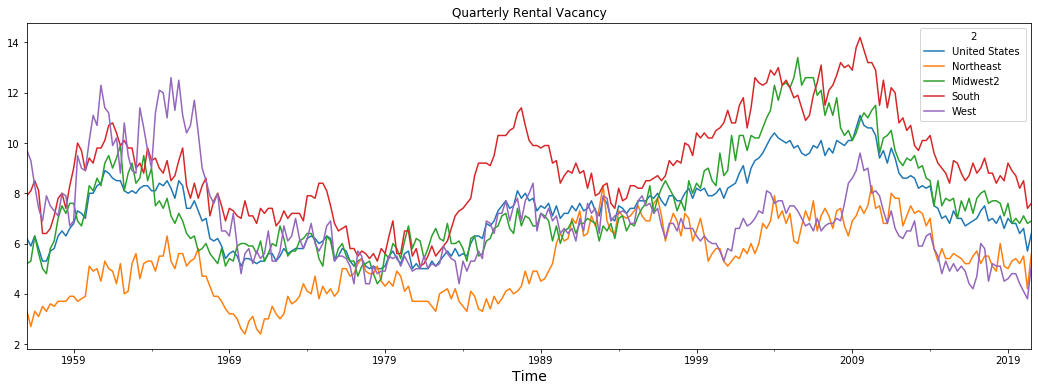

In [41]:
rental_vacancy.plot(figsize=(18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Quarterly Rental Vacancy')

ValueError: x is required to have ndim 1 but has ndim 2

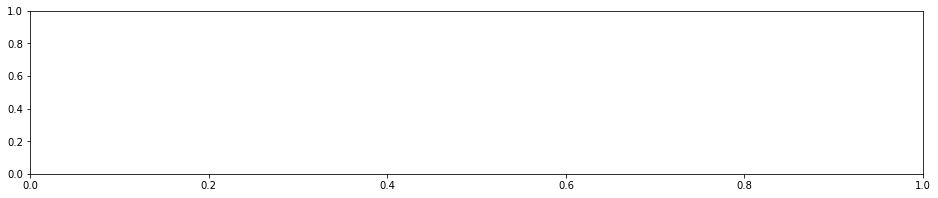

In [42]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(rental_vacancy, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(rental_vacancy, ax=ax, lags=40);

# Narrowing Down Geographic Area

### Due to the high number of baby boomers living in new york where demand for property is high based on population, we will continue with that dataset since it will likely result in a high amount of probate properties as time goes on. 

In [43]:
ny = melted[melted['State'] == 'NY']

In [44]:
ny.head()

,Zipcode,City,State,CountyName,time,value
6,10467,New York,NY,Bronx,1996-04-01,152900.0
10,11226,New York,NY,Kings,1996-04-01,162000.0
12,11375,New York,NY,Queens,1996-04-01,252400.0
13,11235,New York,NY,Kings,1996-04-01,190500.0
21,10128,New York,NY,New York,1996-04-01,3676700.0


In [45]:
ny.Zipcode.value_counts().sort_index()

10011    160
10014    172
10021    172
10128    265
10301    265
10302    265
10303    265
10304    265
10305    265
10306    265
10307    265
10308    265
10309    265
10310    265
10312    265
10314    265
10456     52
10459    178
10461    265
10462    265
10463    265
10464    265
10465    265
10466    265
10467    265
10469    265
10470    265
10471    265
10473    265
10501    265
10502    265
10504    265
10506    265
10507    265
10509    265
10510    265
10512    265
10514    265
10516    265
10518    265
10520    265
10522    265
10523    265
10524    265
10526    265
10528    265
10530    265
10532    265
10533    265
10536    265
10537    265
10538    265
10541    265
10543    265
10546    265
10547    265
10549    265
10550     94
10552    265
10553    265
10560    265
10562    265
10566    265
10567    265
10570    265
10573    265
10576    265
10577    265
10579    265
10580    265
10583    265
10588    265
10589    265
10590    265
10591    265
10594    265
10595    265

### properties under 800k. Additionally we want to choose a zipcode with 265 data points to ensure the validity of the findings. 

In [46]:
ny_under = ny[ny['value'] <= 800000]

In [47]:
ny_under = ny[ny['value'] >= 400000]

In [48]:
ny_under.head()

,Zipcode,City,State,CountyName,time,value
21,10128,New York,NY,New York,1996-04-01,3676700.0
2141,10583,Scarsdale,NY,Westchester,1996-04-01,407700.0
5532,11021,Great Neck,NY,Nassau,1996-04-01,449000.0
6434,10538,Larchmont,NY,Westchester,1996-04-01,407200.0
6625,10580,Rye,NY,Westchester,1996-04-01,491700.0


In [49]:
ny_under.Zipcode.value_counts()

11021    265
11030    265
10514    265
11020    265
11724    265
11576    265
11568    265
11023    265
11024    265
10528    265
10128    265
10577    265
10576    265
10583    265
10504    265
10580    265
11797    265
11976    265
10506    265
10538    265
11975    254
11559    245
11545    243
11959    237
11932    232
11771    231
10533    230
10510    230
11577    230
10471    228
11363    227
11930    227
11050    227
10549    225
11530    224
10708    223
10804    222
10590    222
11694    221
10968    221
11753    220
11360    220
11215    220
10536    220
11560    220
10518    219
11509    219
10803    217
10501    216
10605    216
11598    213
11362    213
10706    212
11579    210
10546    210
11968    210
11768    209
14722    209
10560    209
11791    209
10964    208
10543    208
10522    208
10502    208
11569    206
11937    206
11963    206
11732    206
11777    205
10709    204
10570    204
11230    204
11209    203
11977    202
11739    202
10604    202
11364    201

In [50]:
ny_under.set_index('time', inplace = True)

### The zipcodes that are being taken under consideration: 

 - 11021
 - 11030
 - 10514
 - 11020
 - 11724
 - 11576
 - 11568
 - 11023
 - 11024
 - 10528
 - 10128
 - 10577
 - 10576
 - 10583
 - 10504
 - 10580
 - 11797
 - 11976
 - 10506
 - 10538

### Separate dataframes can be created for each zipcode.

### Modeling for each one 

In [51]:
oh_two_one = ny_under[ny_under['Zipcode'] == 11021]

In [52]:
oh_two_one.head()

,Zipcode,City,State,CountyName,value
time,,,,,
1996-04-01,11021,Great Neck,NY,Nassau,449000.0
1996-05-01,11021,Great Neck,NY,Nassau,448400.0
1996-06-01,11021,Great Neck,NY,Nassau,447600.0
1996-07-01,11021,Great Neck,NY,Nassau,446800.0
1996-08-01,11021,Great Neck,NY,Nassau,446000.0


In [53]:
oh_two_one.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
oh_three_oh = ny_under[ny_under['Zipcode'] == 11030]

In [55]:
oh_three_oh.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
five_one_four = ny_under[ny_under['Zipcode'] == 10514]

In [57]:
five_one_four.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
oh_two_oh = ny_under[ny_under['Zipcode'] == 11020]

In [59]:
oh_two_oh.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
seven_two_four  = ny_under[ny_under['Zipcode'] == 11724]

In [61]:
seven_two_four.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
five_seven_six = ny_under[ny_under['Zipcode'] == 11576]

In [63]:
five_seven_six.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
five_six_eight = ny_under[ny_under['Zipcode'] == 11568]

In [65]:
five_six_eight.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
oh_two_three = ny_under[ny_under['Zipcode'] == 11023]

In [67]:
oh_two_three.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
oh_two_four = ny_under[ny_under['Zipcode'] == 11024]

In [69]:
oh_two_four.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
five_two_eight = ny_under[ny_under['Zipcode'] == 10528]

In [71]:
five_two_eight.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
one_two_eight = ny_under[ny_under['Zipcode'] == 10128]

In [73]:
one_two_eight.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
five_seven_seven = ny_under[ny_under['Zipcode'] == 10577]

In [75]:
five_seven_seven.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
oh_five_seven_six = ny_under[ny_under['Zipcode'] == 10576]

In [77]:
oh_five_seven_six.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
five_eight_three = ny_under[ny_under['Zipcode'] == 10583]

In [79]:
five_eight_three.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
five_oh_four = ny_under[ny_under['Zipcode'] == 10504]

In [81]:
five_oh_four.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
five_eight_oh = ny_under[ny_under['Zipcode'] == 10580]

In [83]:
five_eight_oh.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
seven_nine_seven = ny_under[ny_under['Zipcode'] == 11797]

In [85]:
seven_nine_seven.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
nine_seven_six = ny_under[ny_under['Zipcode'] == 11976]

In [87]:
nine_seven_six.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
five_oh_six = ny_under[ny_under['Zipcode'] == 10506]

In [89]:
five_oh_six.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
five_three_eight = ny_under[ny_under['Zipcode'] == 10538]

In [91]:
five_three_eight.drop(columns = ['Zipcode', 'City', 'State', 'CountyName'], inplace = True)

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### The zipcodes can be analyzed geographically.

In [ ]:
ny_under # look at a map here

# ARIMA Modeling 20 New York State Zipcodes

### Autocorrelation can be observed. 

In [93]:
ny_under.corr()

,Zipcode,value
Zipcode,1.000000,-0.202642
value,-0.202642,1.000000


### The housing bubble is evident in these models.

### 11021

Text(0.5, 1.0, 'Median Sale Prices in 11021')

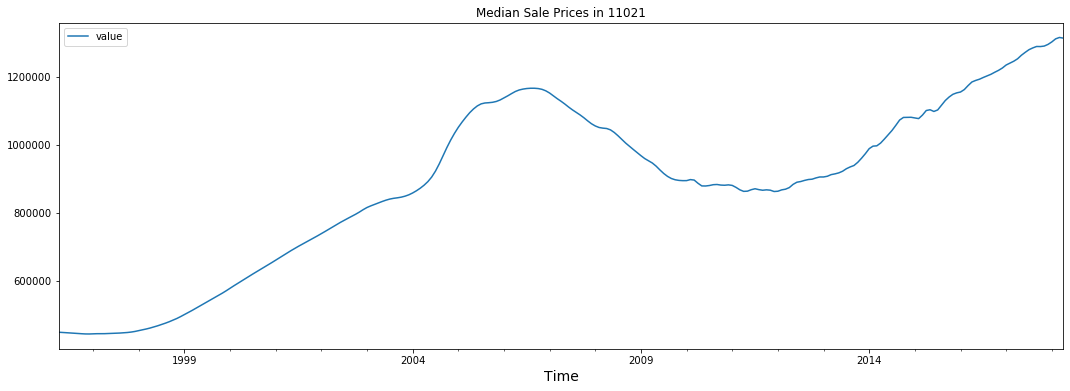

In [94]:
oh_two_one.plot(figsize=(18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11021')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [95]:
oh_two_one.head()

,value
time,
1996-04-01,449000.0
1996-05-01,448400.0
1996-06-01,447600.0
1996-07-01,446800.0
1996-08-01,446000.0


The data is stationary. 

In [96]:
adf_test = ADFTest(alpha = .05)
adf_test.should_diff(oh_two_one)

(0.2812943931475783, True)

Auto ARIMA reduces the need to provide p, d, and q values. 

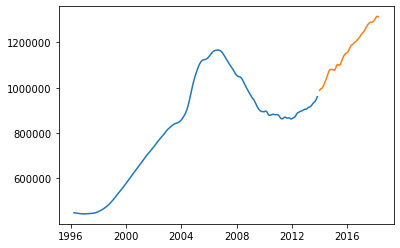

In [97]:
train = oh_two_one[:212]
test = oh_two_one[213:265]
plt.plot(train)
plt.plot(test)

In [106]:
from pmdarima.arima import ndiffs

In [108]:
ndiffs(oh_two_one)

1

In [109]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4080.123, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4075.142, Time=0.54 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4084.741, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4074.573, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4075.091, Time=0.50 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4072.247, Time=0.22 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4072.727, Time=0.72 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=4072.672, Time=0.87 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=4071.415, Time=0.32 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4071.828, Time=0.91 sec
 ARIMA(3,1,0)(0,1,1)[12]             : AIC=4071.981, Time=0.85 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(4,1,0)(0,1,0)[12]          

In [110]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(3, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2031.708
Date:                            Fri, 11 Dec 2020   AIC                           4071.415
Time:                                    20:48:45   BIC                           4084.588
Sample:                                         0   HQIC                          4076.747
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0390      0.006      7.013      0.000       0.028       0.050
ar.L2          0.0305      0.007      4.413      0.000       0.017       0.044
ar.L3          0.0252      0.008      3.066      0.002       0.009       0.041
sigma2      4.293e+07    1.2e-12   3.59e+19      0.000    4.29e+07    4.29e+07
===================================================================================
Ljung-Box (Q):                      550.20   Jarque-Bera (JB):                30.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.81e+35. Standard errors may be unstable.
"""

### Forecasting can be done one the test data. 

In [111]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,963823.867266
2014-02-01,964316.121028
2014-03-01,966666.258939
2014-04-01,971506.753493
2014-05-01,973728.375092


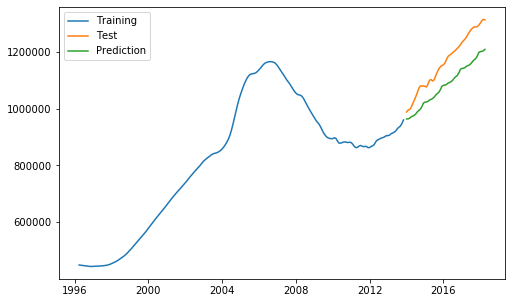

In [112]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [113]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.22949567518054714

### 11030

Text(0.5, 1.0, 'Median Sale Prices in 11030')

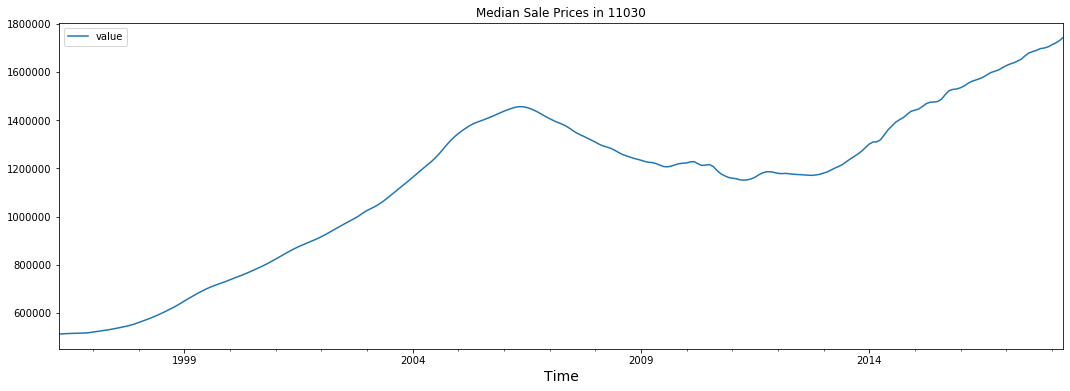

In [114]:
oh_three_oh.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11030')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [115]:
adf_test.should_diff(oh_three_oh)

(0.3636759354850009, True)

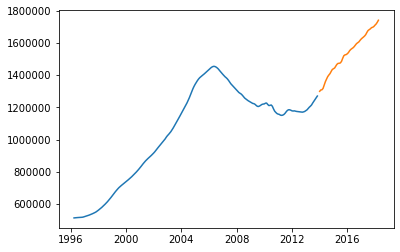

In [116]:
train = oh_three_oh[:212]
test = oh_three_oh[213:265]
plt.plot(train)
plt.plot(test)

In [117]:
ndiffs(oh_two_one)

NameError: name 'pmdarima' is not defined

In [118]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4069.747, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4521.193, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4086.238, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4070.398, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4072.799, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4066.866, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4521.093, Time=0.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4066.541, Time=0.25 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4067.467, Time=0.83 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=4067.449, Time=0.69 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.00 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=4067.126, Time=0.34 sec
 ARIMA(2,1,1)(0,1,0)[12]          

In [119]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2030.270
Date:                            Fri, 11 Dec 2020   AIC                           4066.541
Time:                                    20:49:07   BIC                           4076.421
Sample:                                         0   HQIC                          4070.540
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0277      0.006      4.894      0.000       0.017       0.039
ar.L2          0.0201      0.007      2.789      0.005       0.006       0.034
sigma2      4.244e+07   5.03e-13   8.44e+19      0.000    4.24e+07    4.24e+07
===================================================================================
Ljung-Box (Q):                      662.70   Jarque-Bera (JB):                14.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.73   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  3e+35. Standard errors may be unstable.
"""

In [120]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,1.274207e+06
2014-02-01,1.279226e+06
2014-03-01,1.284442e+06
2014-04-01,1.292547e+06
2014-05-01,1.300548e+06


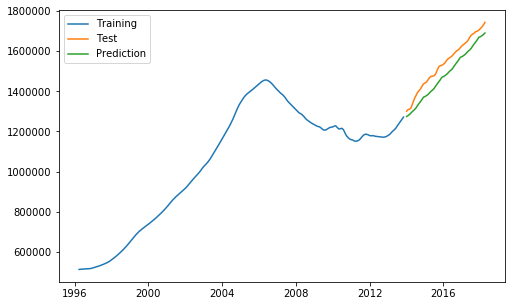

In [121]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [122]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.7785144921277446

### 10514

Text(0.5, 1.0, 'Median Sale Prices in 10514')

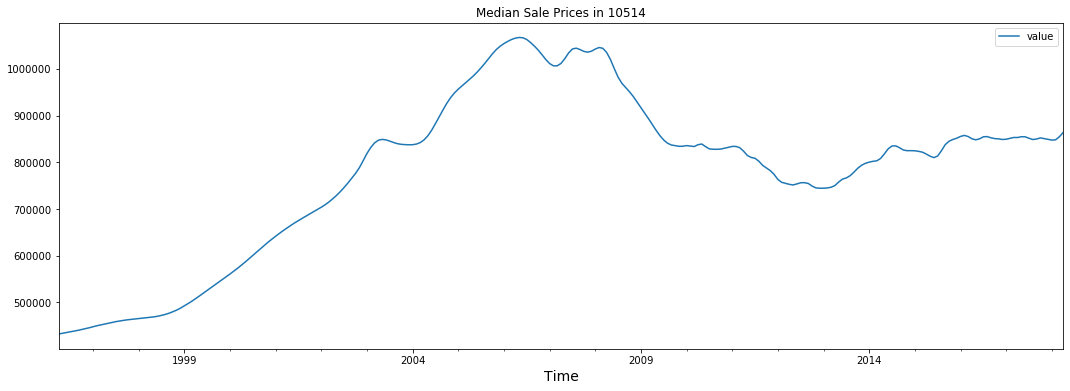

In [123]:
five_one_four.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10514')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [124]:
adf_test.should_diff(five_one_four)

(0.6666885331563399, True)

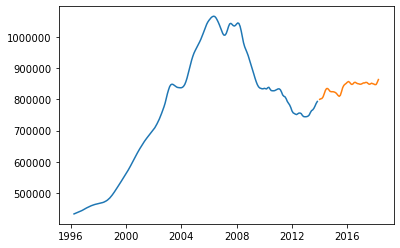

In [125]:
train = five_one_four[:212]
test = five_one_four[213:265]
plt.plot(train)
plt.plot(test)

In [127]:
ndiffs(five_one_four)

2

In [128]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4166.585, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4153.797, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4162.089, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4155.543, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4150.452, Time=1.27 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4686.381, Time=1.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=4688.767, Time=3.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4170.555, Time=0.24 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4145.232, Time=1.76 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4148.538, Time=0.73 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=4146.639, Time=4.67 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.19 sec
 ARIMA(2,1,0)(1,1,1)[12]          

In [129]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  212
Model:             SARIMAX(2, 1, 1)x(2, 1, [], 12)   Log Likelihood               -2065.705
Date:                             Fri, 11 Dec 2020   AIC                           4143.410
Time:                                     20:50:44   BIC                           4163.170
Sample:                                          0   HQIC                          4151.407
                                             - 212                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6157      0.178      3.467      0.001       0.268       0.964
ar.L2          0.0204      0.016      1.272      0.204      -0.011       0.052
ma.L1         -0.5493      0.177     -3.105      0.002      -0.896      -0.203
ar.S.L12      -0.0663      0.018     -3.717      0.000      -0.101      -0.031
ar.S.L24      -0.0430      0.011     -3.894      0.000      -0.065      -0.021
sigma2      6.648e+07   2.67e-10   2.49e+17      0.000    6.65e+07    6.65e+07
===================================================================================
Ljung-Box (Q):                      554.51   Jarque-Bera (JB):                25.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.79e+33. Standard errors may be unstable.
"""

In [130]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,794724.883660
2014-02-01,795922.423341
2014-03-01,797211.517631
2014-04-01,799008.321731
2014-05-01,802458.940171


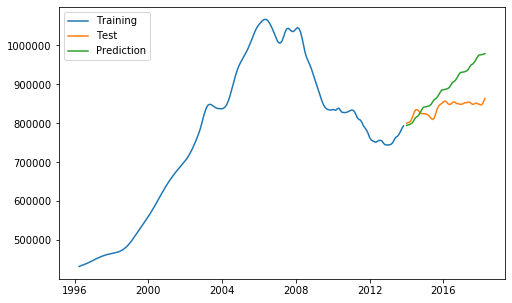

In [131]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [132]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-13.773070086132961

### 11020

Text(0.5, 1.0, 'Median Sale Prices in 11020')

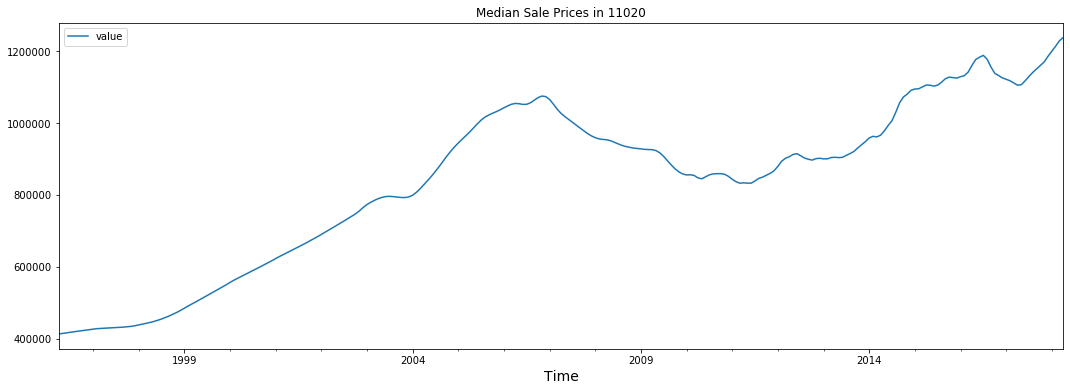

In [133]:
oh_two_oh.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11020')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [134]:
adf_test.should_diff(oh_two_oh)

(0.4914204453170047, True)

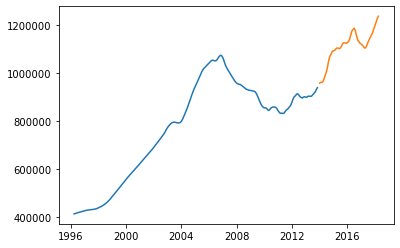

In [135]:
train = oh_two_oh[:212]
test = oh_two_oh[213:265]
plt.plot(train)
plt.plot(test)

In [142]:
ndiffs(oh_two_oh)

1

In [143]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4092.444, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4403.009, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4100.759, Time=0.24 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4092.706, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4094.885, Time=0.11 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4413.452, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4103.052, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=4093.983, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.843 seconds


In [144]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2045.222
Date:                            Fri, 11 Dec 2020   AIC                           4092.444
Time:                                    21:01:23   BIC                           4095.737
Sample:                                         0   HQIC                          4093.777
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.635e+07    3.9e+06     11.872      0.000    3.87e+07     5.4e+07
===================================================================================
Ljung-Box (Q):                      464.27   Jarque-Bera (JB):                 2.19
Prob(Q):                              0.00   Prob(JB):                         0.33
Heteroskedasticity (H):              22.45   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,941000.0
2014-02-01,939300.0
2014-03-01,939400.0
2014-04-01,943000.0
2014-05-01,943700.0


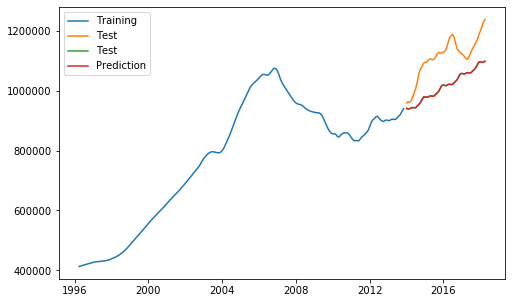

In [146]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [147]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-1.3845006706455263

### 11724

Text(0.5, 1.0, 'Median Sale Prices in 11724')

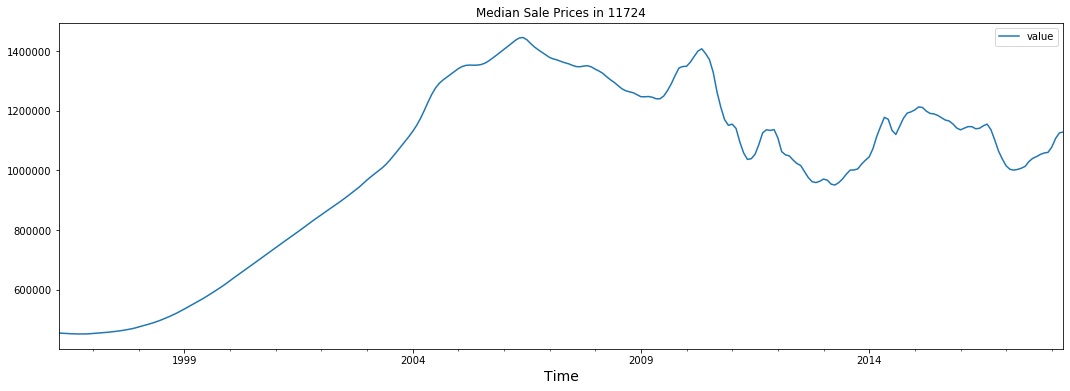

In [148]:
seven_two_four.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11724')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [149]:
adf_test.should_diff(seven_two_four)

(0.7557436687013525, True)

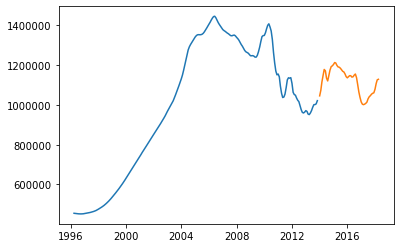

In [150]:
train = seven_two_four[:212]
test = seven_two_four[213:265]
plt.plot(train)
plt.plot(test)

In [152]:
ndiffs(oh_two_one)

1

In [153]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4533.649, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4524.774, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4464.153, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4514.245, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4453.816, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4475.188, Time=0.12 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4455.366, Time=0.76 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4455.432, Time=1.10 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4457.725, Time=0.31 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4467.945, Time=0.29 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=1.89 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4487.482, Time=0.21 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=4470.594, Time=0.50 sec
 ARIMA(1,1,0)(1,1,1)[12]     

In [154]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2222.908
Date:                            Fri, 11 Dec 2020   AIC                           4453.816
Time:                                    21:01:46   BIC                           4466.989
Sample:                                         0   HQIC                          4459.147
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2026      0.012     17.301      0.000       0.180       0.226
ar.S.L12       0.4005      0.031     12.759      0.000       0.339       0.462
ma.S.L12      -0.7897      0.050    -15.694      0.000      -0.888      -0.691
sigma2       2.66e+08   9.01e-11   2.95e+18      0.000    2.66e+08    2.66e+08
===================================================================================
Ljung-Box (Q):                      318.33   Jarque-Bera (JB):               173.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  6e+34. Standard errors may be unstable.
"""

In [155]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,1.027069e+06
2014-02-01,1.029793e+06
2014-03-01,1.024057e+06
2014-04-01,1.013432e+06
2014-05-01,1.011430e+06


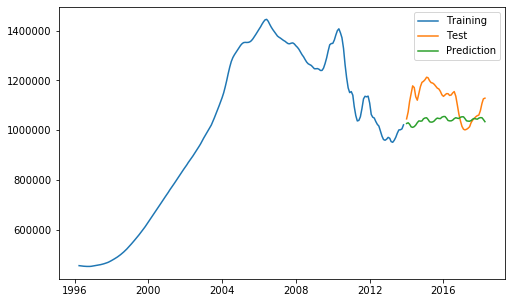

In [156]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [157]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-1.6144893662281592

### 11576

Text(0.5, 1.0, 'Median Sale Prices in 11576')

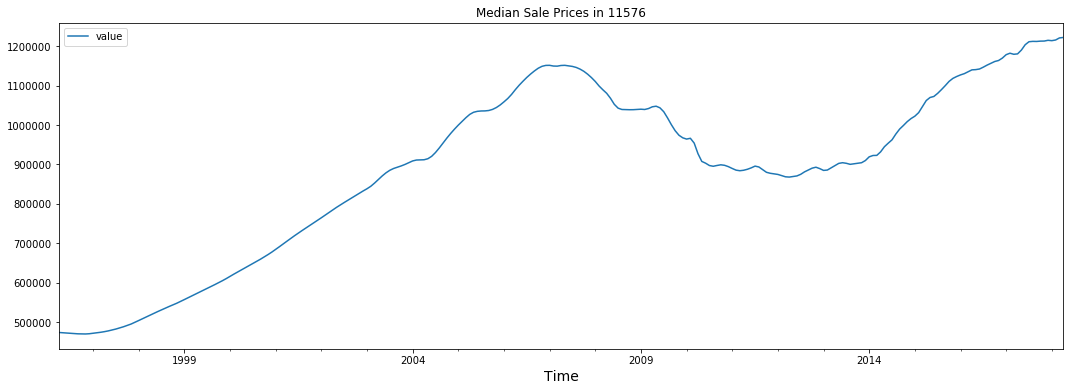

In [158]:
five_seven_six.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11576')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [159]:
adf_test.should_diff(five_seven_six)

(0.43960345496901543, True)

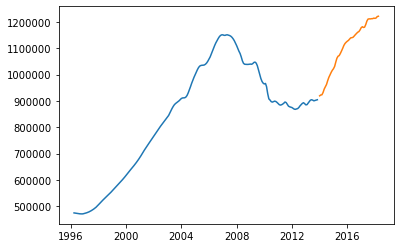

In [160]:
train = five_seven_six[:212]
test = five_seven_six[213:265]
plt.plot(train)
plt.plot(test)

In [162]:
ndiffs(five_seven_six)

1

In [163]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4116.386, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4298.217, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4141.733, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4113.381, Time=0.23 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4121.362, Time=0.50 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4116.014, Time=0.24 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4141.943, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4497.083, Time=0.45 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=4115.457, Time=0.09 sec

Best model:  ARIMA(0,1,0)(1,1,0)[12]          
Total fit time: 3.722 seconds


In [164]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -2054.691
Date:                            Fri, 11 Dec 2020   AIC                           4113.381
Time:                                    21:02:09   BIC                           4119.968
Sample:                                         0   HQIC                          4116.047
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0339      0.009     -3.667      0.000      -0.052      -0.016
sigma2      5.435e+07   2.51e-12   2.17e+19      0.000    5.44e+07    5.44e+07
===================================================================================
Ljung-Box (Q):                      509.86   Jarque-Bera (JB):                32.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              20.46   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+36. Standard errors may be unstable.
"""

In [165]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,900967.899031
2014-02-01,896476.537481
2014-03-01,897240.739419
2014-04-01,902552.168537
2014-05-01,908131.496686


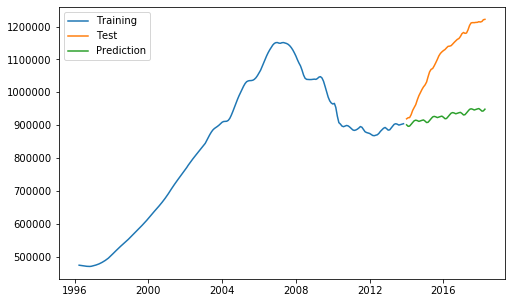

In [166]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [167]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-3.304409469299328

### 11568

Text(0.5, 1.0, 'Median Sale Prices in 11568')

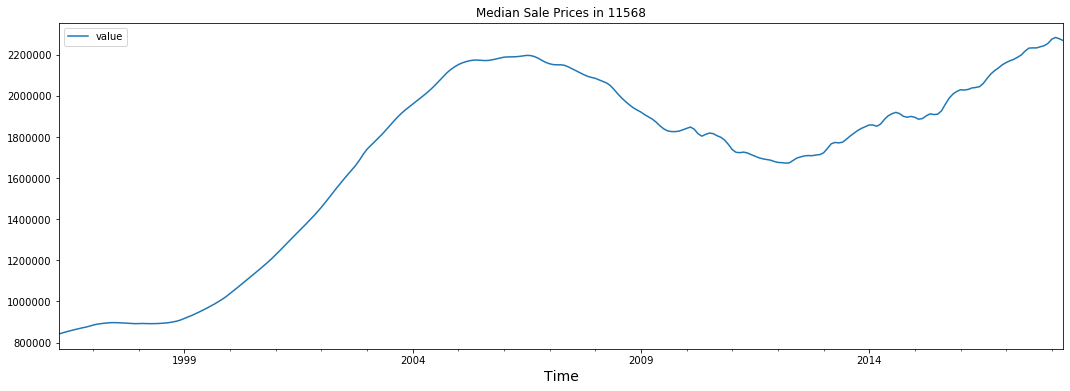

In [168]:
five_six_eight.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11568')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [169]:
adf_test.should_diff(five_six_eight)

(0.38451023612617385, True)

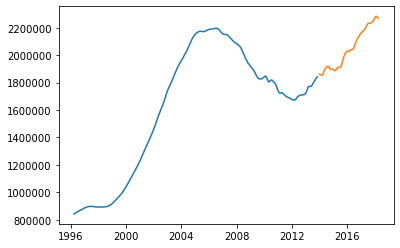

In [170]:
train = five_six_eight[:212]
test = five_six_eight[213:265]
plt.plot(train)
plt.plot(test)

In [172]:
ndiffs(five_six_eight)

2

In [173]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4214.670, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4364.292, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4302.840, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4216.319, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4217.760, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4219.159, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4211.208, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4364.291, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4504.274, Time=0.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4300.881, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=4212.794, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,1,0)[

In [174]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2103.604
Date:                            Fri, 11 Dec 2020   AIC                           4211.208
Time:                                    21:02:49   BIC                           4217.795
Sample:                                         0   HQIC                          4213.874
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0256      0.006      4.129      0.000       0.013       0.038
sigma2      8.889e+07   3.42e-15    2.6e+22      0.000    8.89e+07    8.89e+07
===================================================================================
Ljung-Box (Q):                      401.20   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               5.51   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+40. Standard errors may be unstable.
"""

In [175]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,1.844077e+06
2014-02-01,1.852681e+06
2014-03-01,1.873382e+06
2014-04-01,1.896382e+06
2014-05-01,1.903282e+06


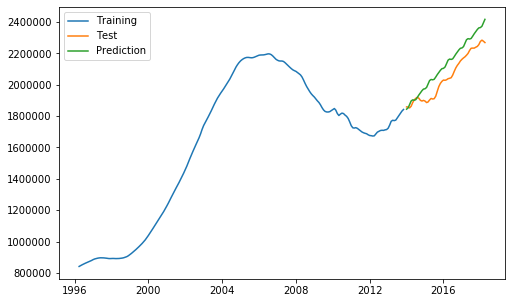

In [176]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [177]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.6174008956852015

### 11023

Text(0.5, 1.0, 'Median Sale Prices in 11023')

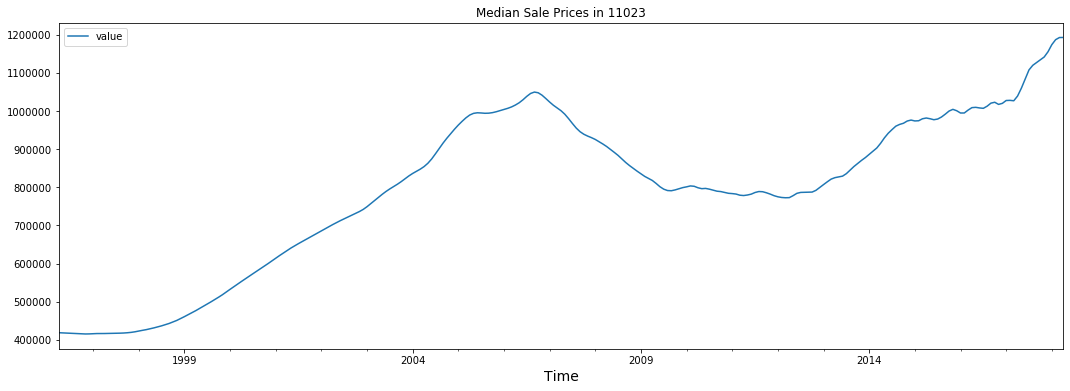

In [178]:
oh_two_three.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11023')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [179]:
adf_test.should_diff(oh_two_three)

(0.4537750984864751, True)

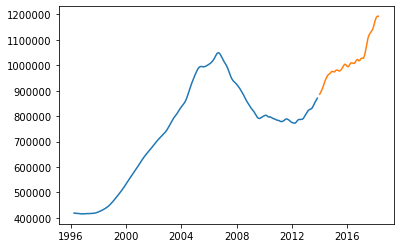

In [180]:
train = oh_two_three[:212]
test = oh_two_three[213:265]
plt.plot(train)
plt.plot(test)

In [183]:
ndiffs(oh_two_three)

1

In [182]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4003.734, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4000.229, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4007.582, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3999.438, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4000.197, Time=0.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=3997.953, Time=0.31 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=3998.679, Time=0.89 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=3998.646, Time=0.81 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=3998.390, Time=0.32 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AIC=5288.536, Time=0.28 sec
 ARIMA(2,1,0)(0,1,0)[12] intercept   : 

In [184]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1995.976
Date:                            Fri, 11 Dec 2020   AIC                           3997.953
Time:                                    21:03:17   BIC                           4007.832
Sample:                                         0   HQIC                          4001.951
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0332      0.005      6.063      0.000       0.022       0.044
ar.L2          0.0257      0.007      3.681      0.000       0.012       0.039
sigma2      2.999e+07   1.42e-12   2.12e+19      0.000       3e+07       3e+07
===================================================================================
Ljung-Box (Q):                      729.65   Jarque-Bera (JB):                82.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.35   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.33e+34. Standard errors may be unstable.
"""

In [185]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,878617.234346
2014-02-01,886120.206668
2014-03-01,893531.771111
2014-04-01,900534.799151
2014-05-01,904335.196628


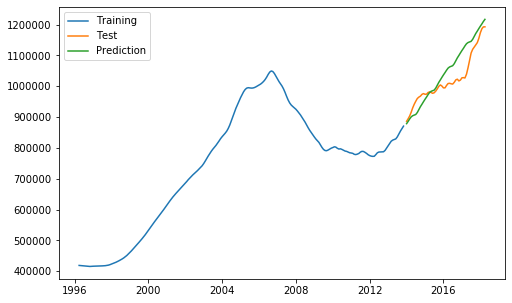

In [186]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [187]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.6171623961577022

### 11024

Text(0.5, 1.0, 'Median Sale Prices in 11024')

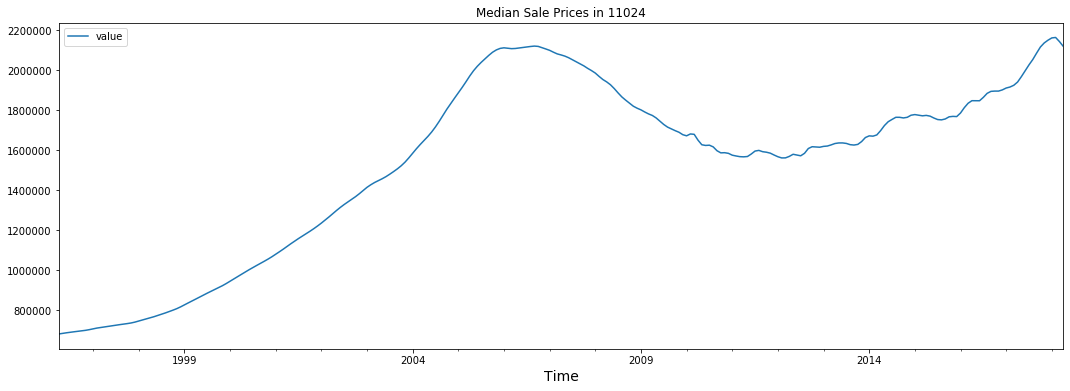

In [188]:
oh_two_four.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11024')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [189]:
adf_test.should_diff(oh_two_four)

(0.5856669760615284, True)

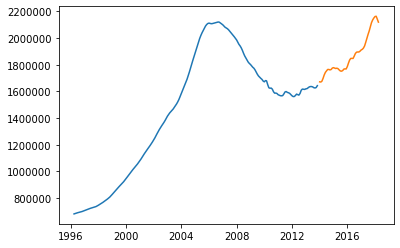

In [190]:
train = oh_two_four[:212]
test = oh_two_four[213:265]
plt.plot(train)
plt.plot(test)

In [192]:
ndiffs(oh_two_four)

2

In [199]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4225.412, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4325.932, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4308.742, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4227.329, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4230.285, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4232.252, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4222.069, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4325.931, Time=0.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4362.098, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4204.962, Time=0.28 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4218.117, Time=0.67 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(0,1,1)(0,1,0)[12]          

In [200]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  212
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood               -2098.334
Date:                             Fri, 11 Dec 2020   AIC                           4204.668
Time:                                     21:04:20   BIC                           4217.841
Sample:                                          0   HQIC                          4210.000
                                             - 212                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0211      0.015     67.995      0.000       0.992       1.051
ar.L2         -0.0211      0.009     -2.463      0.014      -0.038      -0.004
ma.L1         -0.9481      0.009   -104.478      0.000      -0.966      -0.930
sigma2      8.446e+07   1.68e-11   5.03e+18      0.000    8.45e+07    8.45e+07
===================================================================================
Ljung-Box (Q):                      331.52   Jarque-Bera (JB):                41.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.69   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.94e+35. Standard errors may be unstable.
"""

In [201]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,1.643351e+06
2014-02-01,1.649020e+06
2014-03-01,1.652182e+06
2014-04-01,1.659445e+06
2014-05-01,1.667808e+06


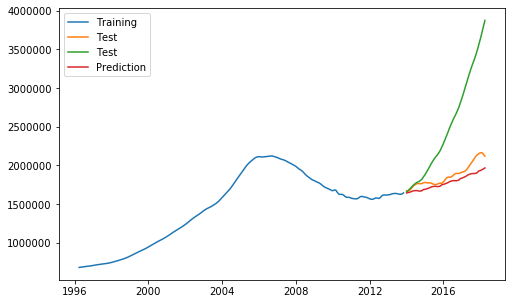

In [202]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [203]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.4432922597175821

### 10528

Text(0.5, 1.0, 'Median Sale Prices in 10528')

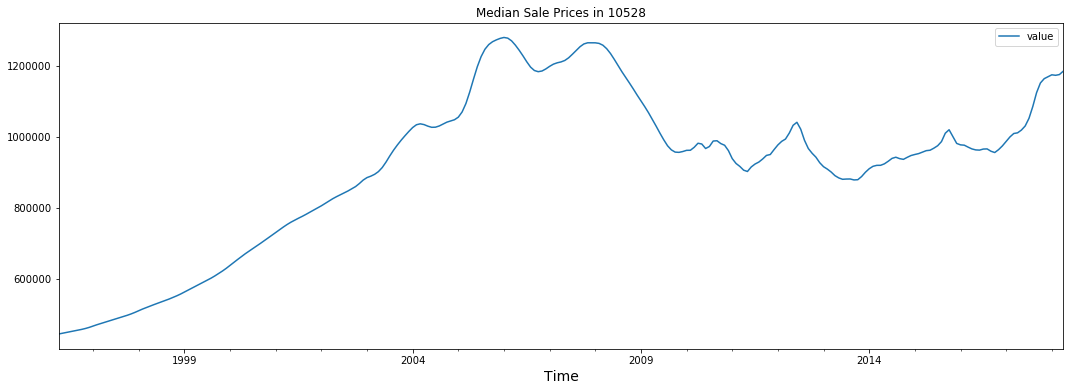

In [204]:
five_two_eight.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10528')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [205]:
adf_test.should_diff(five_two_eight)

(0.5920687995747355, True)

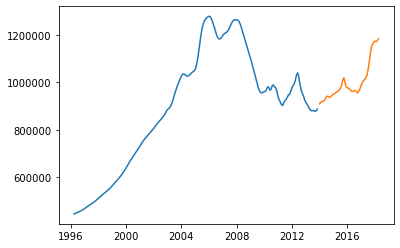

In [206]:
train = five_two_eight[:212]
test = five_two_eight[213:265]
plt.plot(train)
plt.plot(test)

In [208]:
ndiffs(five_two_eight)

1

In [209]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4423.377, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4612.053, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4376.293, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4403.233, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4362.011, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4381.060, Time=0.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4363.807, Time=1.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4363.826, Time=1.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4369.251, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4376.252, Time=0.29 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4395.853, Time=0.27 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=4355.005, Time=0.54 sec
 ARIMA(0,1,2)(0,1,1)[12]     

In [210]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  212
Model:             SARIMAX(0, 1, 5)x(1, 1, [1], 12)   Log Likelihood               -2162.483
Date:                              Fri, 11 Dec 2020   AIC                           4340.967
Time:                                      21:05:51   BIC                           4367.313
Sample:                                           0   HQIC                          4351.630
                                              - 212                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1629      0.010     16.849      0.000       0.144       0.182
ma.L2          0.1273      0.015      8.768      0.000       0.099       0.156
ma.L3          0.1044      0.020      5.104      0.000       0.064       0.144
ma.L4          0.0814      0.031      2.643      0.008       0.021       0.142
ma.L5          0.0504      0.066      0.769      0.442      -0.078       0.179
ar.S.L12       0.5379      0.038     14.075      0.000       0.463       0.613
ma.S.L12      -0.8170      0.054    -15.163      0.000      -0.923      -0.711
sigma2      1.696e+08   3.65e-11   4.64e+18      0.000     1.7e+08     1.7e+08
===================================================================================
Ljung-Box (Q):                      398.20   Jarque-Bera (JB):                32.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.06
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.9e+34. Standard errors may be unstable.
"""

In [211]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,883146.077362
2014-02-01,878740.956596
2014-03-01,875663.273538
2014-04-01,870774.699147
2014-05-01,865720.520662


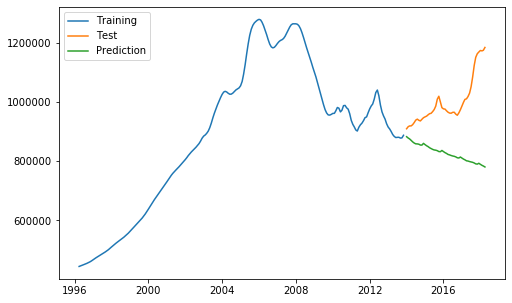

In [212]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [213]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-5.574227993904603

### 10128

Text(0.5, 1.0, 'Median Sale Prices in 10128')

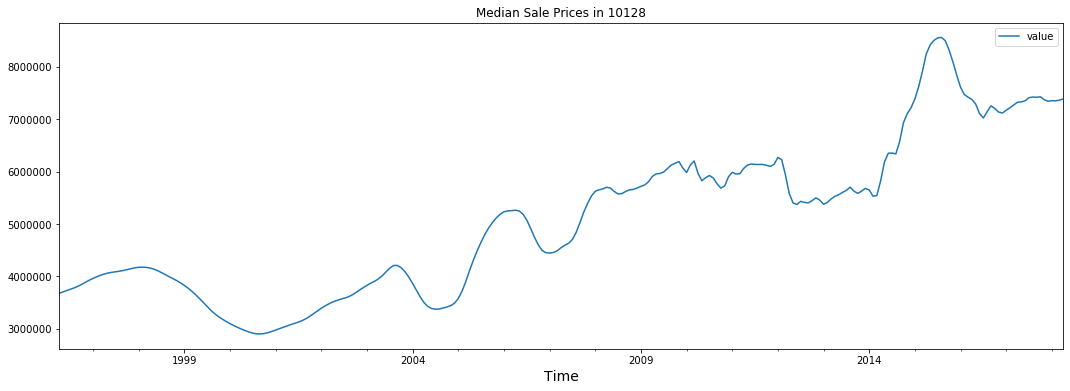

In [214]:
one_two_eight.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10128')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [215]:
adf_test.should_diff(one_two_eight)

(0.045573150036232274, False)

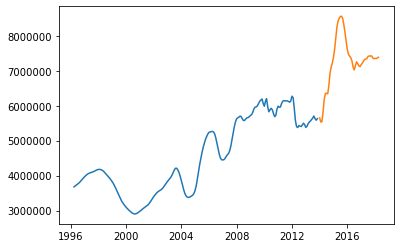

In [216]:
train = one_two_eight[:212]
test = one_two_eight[213:265]
plt.plot(train)
plt.plot(test)

In [219]:
ndiffs(one_two_eight)

1

In [218]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5261.219, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5282.069, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5256.403, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5291.167, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5241.720, Time=0.54 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=inf, Time=8.10 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=inf, Time=4.42 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=5258.756, Time=0.25 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=5310.807, Time=0.83 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=5236.371, Time=0.53 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=5251.185, Time=0.31 sec
 ARIMA(0,1,2)(1,1,2)[12]             : AIC=inf, Time=1.95 sec
 ARIMA(0,1,2)(0,1,3)[12]             : AIC=i

In [220]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(0, 1, 3)x(1, 1, 3, 12)   Log Likelihood               -2596.290
Date:                            Fri, 11 Dec 2020   AIC                           5208.580
Time:                                    21:08:06   BIC                           5234.927
Sample:                                         0   HQIC                          5219.243
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1433      0.009     16.766      0.000       0.127       0.160
ma.L2          0.0740      0.021      3.530      0.000       0.033       0.115
ma.L3          0.0529      0.031      1.720      0.085      -0.007       0.113
ar.S.L12       0.3995      0.083      4.837      0.000       0.238       0.561
ma.S.L12      -0.7178      0.081     -8.811      0.000      -0.878      -0.558
ma.S.L24      -0.0576      0.029     -1.996      0.046      -0.114      -0.001
ma.S.L36      -0.0545      0.021     -2.623      0.009      -0.095      -0.014
sigma2       9.15e+09   3.69e-12   2.48e+21      0.000    9.15e+09    9.15e+09
===================================================================================
Ljung-Box (Q):                      364.92   Jarque-Bera (JB):                34.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.94e+36. Standard errors may be unstable.
"""

In [221]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,5.594518e+06
2014-02-01,5.543627e+06
2014-03-01,5.573578e+06
2014-04-01,5.615039e+06
2014-05-01,5.658872e+06


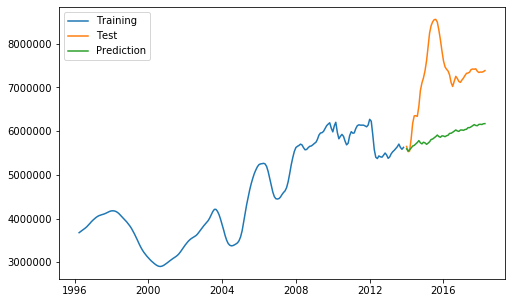

In [222]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [223]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-3.489184776815285

### 10577

Text(0.5, 1.0, 'Median Sale Prices in 10577')

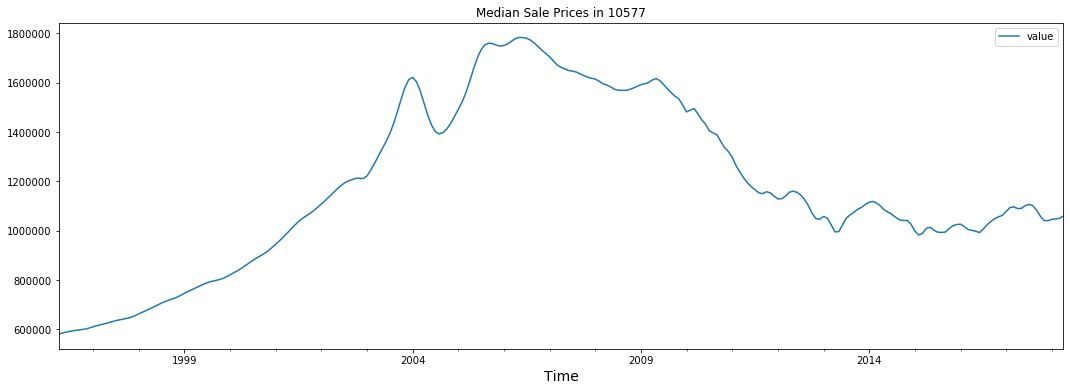

In [224]:
five_seven_seven.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10577')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [225]:
adf_test.should_diff(five_seven_seven)

(0.8502528253315451, True)

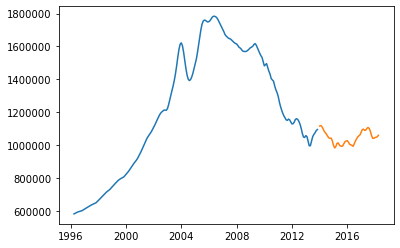

In [226]:
train = five_seven_seven[:212]
test = five_seven_seven[213:265]
plt.plot(train)
plt.plot(test)

In [228]:
ndiffs(five_seven_seven)

2

In [229]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4603.524, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4732.524, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4544.144, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4574.803, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4529.800, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4552.249, Time=0.12 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4531.790, Time=0.81 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4531.791, Time=0.83 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4533.350, Time=0.41 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4542.324, Time=0.23 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=1.53 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4560.607, Time=0.16 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=4520.659, Time=0.37 sec
 ARIMA(0,1,2)(0,1,1)[12]     

In [230]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  212
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -2255.330
Date:                              Fri, 11 Dec 2020   AIC                           4520.659
Time:                                      21:09:06   BIC                           4537.126
Sample:                                           0   HQIC                          4527.324
                                              - 212                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2090      0.009     24.120      0.000       0.192       0.226
ma.L2          0.1369      0.016      8.360      0.000       0.105       0.169
ar.S.L12       0.4882      0.028     17.239      0.000       0.433       0.544
ma.S.L12      -0.8204      0.036    -22.944      0.000      -0.890      -0.750
sigma2        3.2e+08   2.86e-12   1.12e+20      0.000     3.2e+08     3.2e+08
===================================================================================
Ljung-Box (Q):                      282.74   Jarque-Bera (JB):                71.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.26
Prob(H) (two-sided):                  0.82   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+36. Standard errors may be unstable.
"""

In [231]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,1.098409e+06
2014-02-01,1.105924e+06
2014-03-01,1.100157e+06
2014-04-01,1.082019e+06
2014-05-01,1.064621e+06


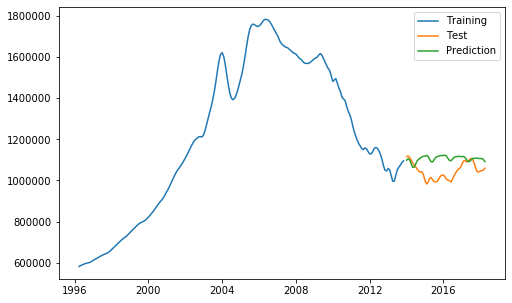

In [232]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [233]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-2.7121198117913212

### 10576

Text(0.5, 1.0, 'Median Sale Prices in 10576')

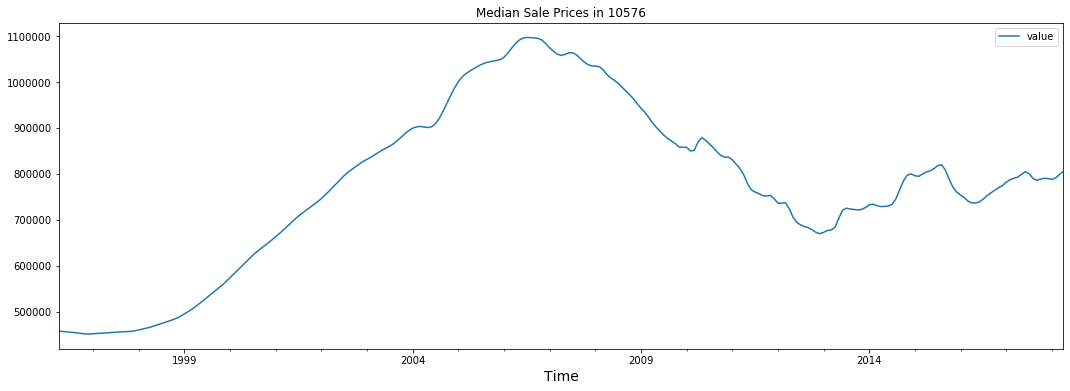

In [234]:
oh_five_seven_six.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10576')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [235]:
adf_test.should_diff(oh_five_seven_six)

(0.7126063737256598, True)

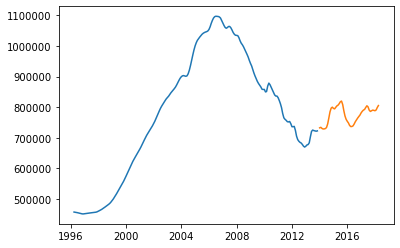

In [236]:
train = oh_five_seven_six[:212]
test = oh_five_seven_six[213:265]
plt.plot(train)
plt.plot(test)

In [239]:
ndiffs(oh_five_seven_six)

2

In [240]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4120.860, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4222.013, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4205.086, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4121.511, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4124.646, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4116.633, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4221.819, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4304.248, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4205.750, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=4118.283, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]  

In [241]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2056.316
Date:                            Fri, 11 Dec 2020   AIC                           4116.633
Time:                                    21:15:11   BIC                           4123.219
Sample:                                         0   HQIC                          4119.299
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0398      0.006      6.155      0.000       0.027       0.053
sigma2       5.52e+07   7.76e-13   7.11e+19      0.000    5.52e+07    5.52e+07
===================================================================================
Ljung-Box (Q):                      229.96   Jarque-Bera (JB):               347.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.67   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.31e+36. Standard errors may be unstable.
"""

In [242]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,719862.891389
2014-02-01,722673.362887
2014-03-01,726873.779988
2014-04-01,727973.796602
2014-05-01,733673.797264


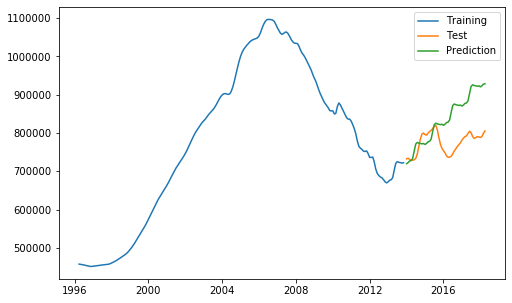

In [243]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [244]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-8.084211961648382

### 10583

Text(0.5, 1.0, 'Median Sale Prices in 10583')

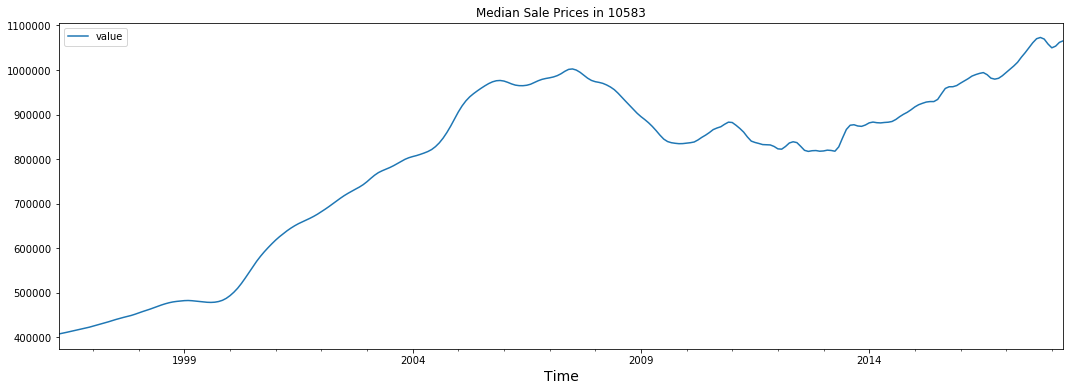

In [245]:
five_eight_three.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10583')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [246]:
adf_test.should_diff(five_eight_three)

(0.6447686532099762, True)

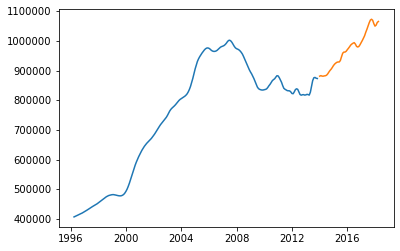

In [247]:
train = five_eight_three[:212]
test = five_eight_three[213:265]
plt.plot(train)
plt.plot(test)

In [250]:
ndiffs(five_eight_three)

1

In [249]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4109.180, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4099.662, Time=0.54 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4117.828, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4100.697, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4100.572, Time=1.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4099.535, Time=0.76 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=4100.012, Time=1.50 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=2.52 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4110.237, Time=0.10 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=4096.257, Time=0.76 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4097.460, Time=0.23 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=4096.650, Time=1.72 sec
 ARIMA(2,1,0)(1,1,0)[12]          

In [251]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  212
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -2042.985
Date:                              Fri, 11 Dec 2020   AIC                           4095.970
Time:                                      21:15:55   BIC                           4112.436
Sample:                                           0   HQIC                          4102.634
                                              - 212                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0556      0.006      9.562      0.000       0.044       0.067
ar.L2          0.0400      0.008      5.031      0.000       0.024       0.056
ar.L3          0.0269      0.012      2.337      0.019       0.004       0.050
ma.S.L12      -0.0329      0.011     -3.043      0.002      -0.054      -0.012
sigma2      4.803e+07   2.83e-12    1.7e+19      0.000     4.8e+07     4.8e+07
===================================================================================
Ljung-Box (Q):                      502.27   Jarque-Bera (JB):                19.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.45e+33. Standard errors may be unstable.
"""

In [252]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,871805.161901
2014-02-01,872043.519677
2014-03-01,873708.805630
2014-04-01,873202.214235
2014-05-01,871790.758153


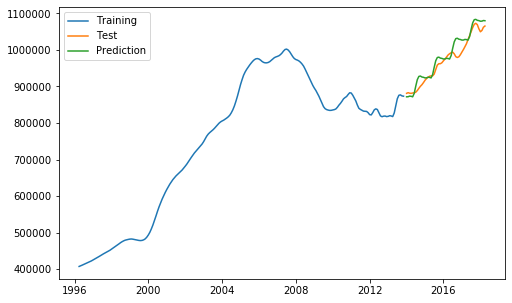

In [253]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [254]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.8837856698927339

### 10504

Text(0.5, 1.0, 'Median Sale Prices in 10504')

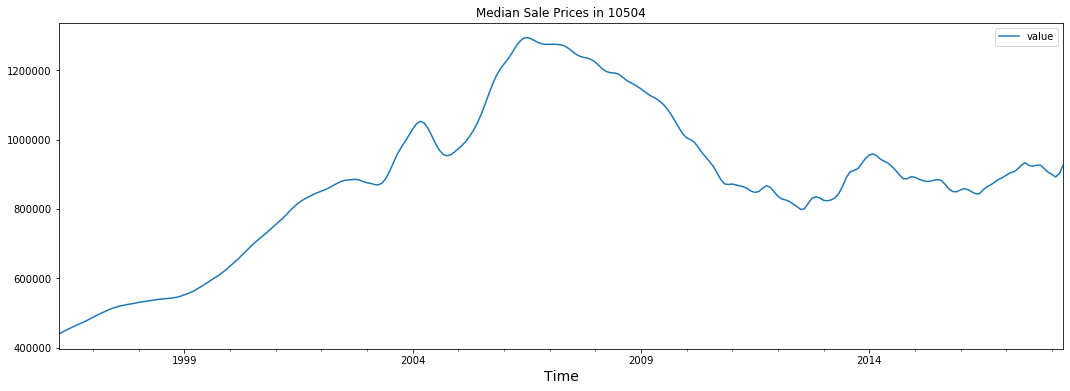

In [255]:
five_oh_four.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10504')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [256]:
adf_test.should_diff(five_oh_four)

(0.6846987181373809, True)

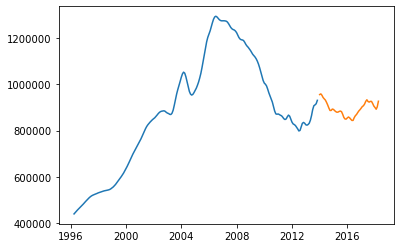

In [257]:
train = five_oh_four[:212]
test = five_oh_four[213:265]
plt.plot(train)
plt.plot(test)

In [260]:
ndiffs(five_oh_four)

2

In [259]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4365.756, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4751.273, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4336.237, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4347.681, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4330.087, Time=0.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=4325.103, Time=2.14 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=inf, Time=1.30 sec
 ARIMA(0,1,1)(0,1,4)[12]             : AIC=4323.180, Time=1.44 sec
 ARIMA(0,1,1)(1,1,4)[12]             : AIC=inf, Time=7.87 sec
 ARIMA(0,1,1)(0,1,5)[12]             : AIC=4324.182, Time=3.33 sec
 ARIMA(0,1,1)(1,1,5)[12]             : AIC=inf, Time=12.13 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=4346.987, Time=1.59 sec
 ARIMA(1,1,1)(0,1,4)[12]             : AIC=

In [261]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:                                             y   No. Observations:                  212
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2, 3, 4], 12)   Log Likelihood               -2155.590
Date:                                       Fri, 11 Dec 2020   AIC                           4323.180
Time:                                               21:17:19   BIC                           4342.940
Sample:                                                    0   HQIC                          4331.178
                                                       - 212                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1370      0.008     16.246      0.000       0.120       0.154
ma.S.L12      -0.2656      0.034     -7.713      0.000      -0.333      -0.198
ma.S.L24      -0.1688      0.025     -6.747      0.000      -0.218      -0.120
ma.S.L36      -0.1139      0.024     -4.753      0.000      -0.161      -0.067
ma.S.L48      -0.0564      0.016     -3.429      0.001      -0.089      -0.024
sigma2      1.351e+08   6.99e-11   1.93e+18      0.000    1.35e+08    1.35e+08
===================================================================================
Ljung-Box (Q):                      465.36   Jarque-Bera (JB):                37.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.46
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+33. Standard errors may be unstable.
"""

In [262]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,929171.168925
2014-02-01,923587.892741
2014-03-01,922023.530506
2014-04-01,923370.510545
2014-05-01,927858.756915


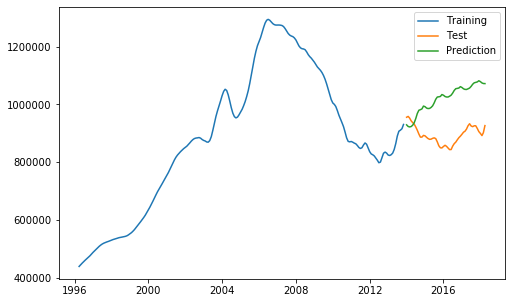

In [263]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [264]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-19.923119746244367

### 10580

Text(0.5, 1.0, 'Median Sale Prices in 10580')

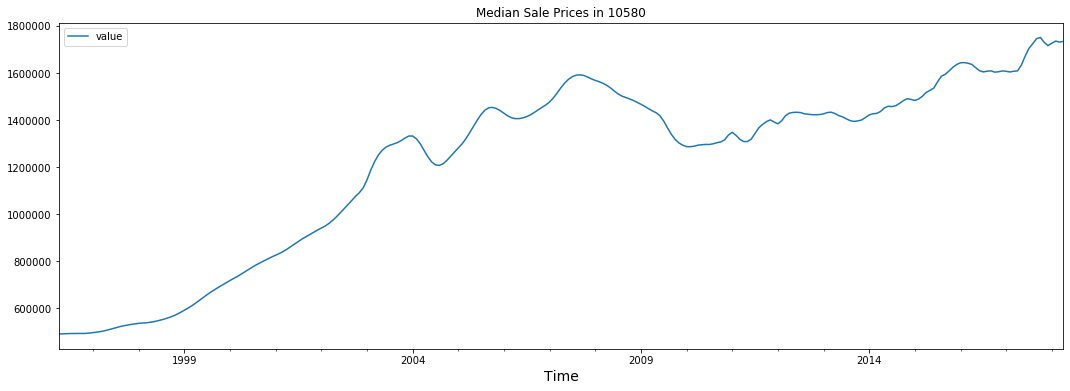

In [265]:
five_eight_oh.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10580')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [266]:
adf_test.should_diff(five_eight_oh)

(0.608558406604441, True)

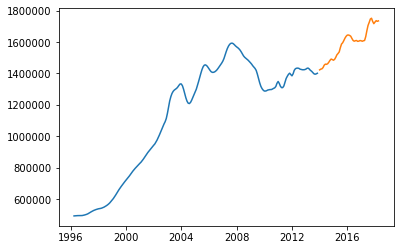

In [267]:
train = five_eight_oh[:212]
test = five_eight_oh[213:265]
plt.plot(train)
plt.plot(test)

In [270]:
ndiffs(five_eight_oh)

1

In [269]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4467.671, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4417.386, Time=0.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4422.230, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4811.553, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4411.759, Time=1.46 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4682.394, Time=1.55 sec


/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,0)(2,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=4.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4459.357, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4399.301, Time=1.70 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5081.538, Time=0.36 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=4393.983, Time=4.34 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=4981.913, Time=3.14 sec


/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,0)(3,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(2,1,0)(4,1,1)[12]             : AIC=inf, Time=7.11 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=4392.414, Time=4.30 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5145.561, Time=1.12 sec
 ARIMA(3,1,0)(4,1,0)[12]             : AIC=4392.003, Time=8.68 sec
 ARIMA(3,1,0)(5,1,0)[12]             : AIC=4394.554, Time=10.91 sec
 ARIMA(3,1,0)(4,1,1)[12]             : AIC=inf, Time=8.72 sec
 ARIMA(3,1,0)(3,1,1)[12]             : AIC=inf, Time=5.31 sec
 ARIMA(3,1,0)(5,1,1)[12]             : AIC=5064.212, Time=14.14 sec
 ARIMA(4,1,0)(4,1,0)[12]             : AIC=4400.240, Time=10.62 sec
 ARIMA(3,1,1)(4,1,0)[12]             : AIC=4414.197, Time=10.78 sec
 ARIMA(2,1,1)(4,1,0)[12]             : AIC=5080.898, Time=3.86 sec
 ARIMA(4,1,1)(4,1,0)[12]             : AIC=5250.588, Time=20.77 sec
 ARIMA(3,1,0)(4,1,0)[12] intercept   : AIC=4393.894, Time=11.46 sec

Best model:  A

In [271]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(3, 1, 0)x(4, 1, 0, 12)   Log Likelihood               -2188.002
Date:                            Fri, 11 Dec 2020   AIC                           4392.003
Time:                                    22:07:23   BIC                           4418.350
Sample:                                         0   HQIC                          4402.666
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1782      0.009     19.143      0.000       0.160       0.196
ar.L2          0.1092      0.013      8.259      0.000       0.083       0.135
ar.L3          0.0663      0.020      3.350      0.001       0.027       0.105
ar.S.L12      -0.2751      0.022    -12.393      0.000      -0.319      -0.232
ar.S.L24      -0.1926      0.024     -8.043      0.000      -0.240      -0.146
ar.S.L36      -0.1342      0.020     -6.757      0.000      -0.173      -0.095
ar.S.L48      -0.0560      0.017     -3.298      0.001      -0.089      -0.023
sigma2      2.175e+08   4.72e-12   4.61e+19      0.000    2.17e+08    2.17e+08
===================================================================================
Ljung-Box (Q):                      329.97   Jarque-Bera (JB):                74.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.12
Prob(H) (two-sided):                  0.12   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.09e+35. Standard errors may be unstable.
"""

In [272]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,1.401480e+06
2014-02-01,1.403733e+06
2014-03-01,1.408078e+06
2014-04-01,1.409943e+06
2014-05-01,1.406123e+06


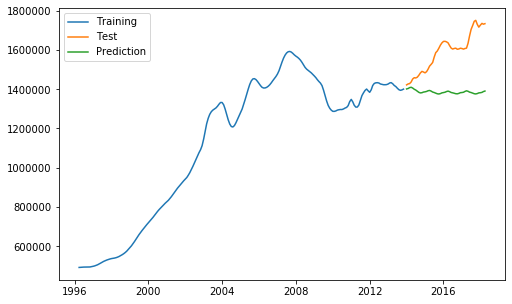

In [273]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [274]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-4.481406897043574

### 11797

Text(0.5, 1.0, 'Median Sale Prices in 11797')

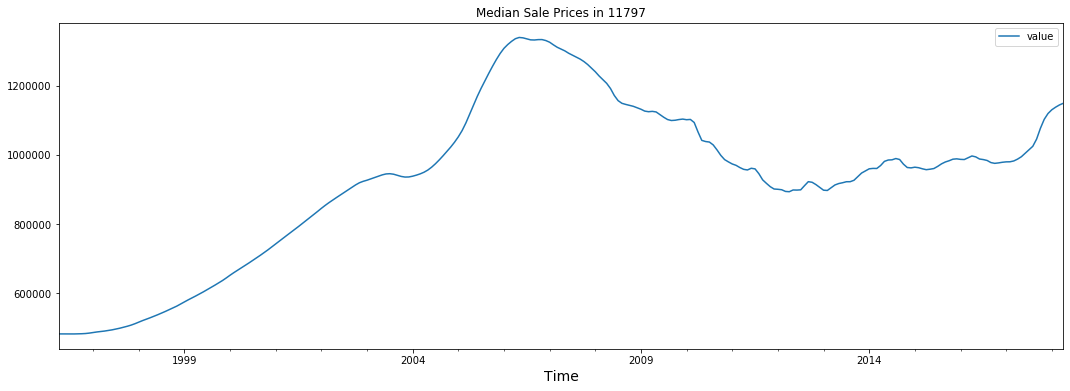

In [275]:
seven_nine_seven.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11797')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [276]:
adf_test.should_diff(seven_nine_seven)

(0.39358882793867056, True)

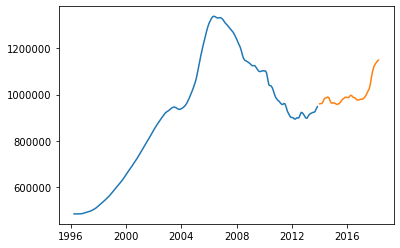

In [277]:
train = seven_nine_seven[:212]
test = seven_nine_seven[213:265]
plt.plot(train)
plt.plot(test)

In [281]:
ndiffs(seven_nine_seven)

2

In [279]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4210.384, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4420.297, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4237.559, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4211.094, Time=0.15 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4214.729, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4422.496, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4237.743, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=4211.942, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.378 seconds


In [280]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2104.192
Date:                            Fri, 11 Dec 2020   AIC                           4210.384
Time:                                    22:07:30   BIC                           4213.678
Sample:                                         0   HQIC                          4211.717
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.384e+07   6.18e+06     13.575      0.000    7.17e+07    9.59e+07
===================================================================================
Ljung-Box (Q):                      722.24   Jarque-Bera (JB):                16.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              37.72   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [282]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,939500.0
2014-02-01,931300.0
2014-03-01,930500.0
2014-04-01,938600.0
2014-05-01,946400.0


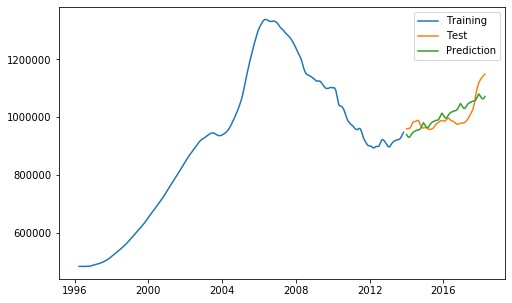

In [283]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [284]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.4841340013536639

### 11976

Text(0.5, 1.0, 'Median Sale Prices in 11976')

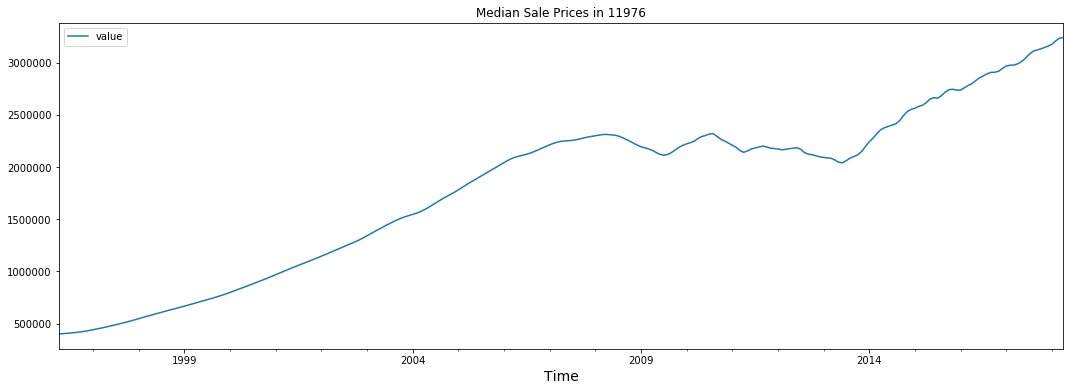

In [285]:
nine_seven_six.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 11976')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [286]:
adf_test.should_diff(nine_seven_six)

(0.6167513324004601, True)

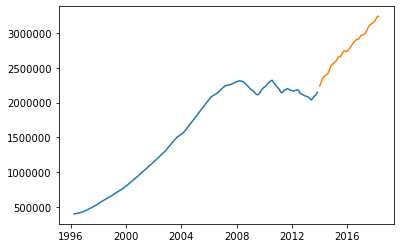

In [287]:
train = nine_seven_six[:212]
test = nine_seven_six[213:265]
plt.plot(train)
plt.plot(test)

In [327]:
ndiffs(nine_seven_six)

1

In [289]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4424.779, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4511.328, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4383.781, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4398.155, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4371.084, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4388.520, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.93 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4378.258, Time=0.51 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4385.094, Time=0.58 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=2.38 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4395.093, Time=0.24 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=i

In [291]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2181.542
Date:                            Fri, 11 Dec 2020   AIC                           4371.084
Time:                                    22:08:24   BIC                           4384.258
Sample:                                         0   HQIC                          4376.416
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1766      0.010     18.460      0.000       0.158       0.195
ar.S.L12       0.5313      0.039     13.597      0.000       0.455       0.608
ma.S.L12      -0.8452      0.050    -17.029      0.000      -0.942      -0.748
sigma2      1.613e+08   5.79e-11   2.79e+18      0.000    1.61e+08    1.61e+08
===================================================================================
Ljung-Box (Q):                      409.35   Jarque-Bera (JB):                43.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.22   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+35. Standard errors may be unstable.
"""

In [292]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,2.149636e+06
2014-02-01,2.146963e+06
2014-03-01,2.144959e+06
2014-04-01,2.142743e+06
2014-05-01,2.134895e+06


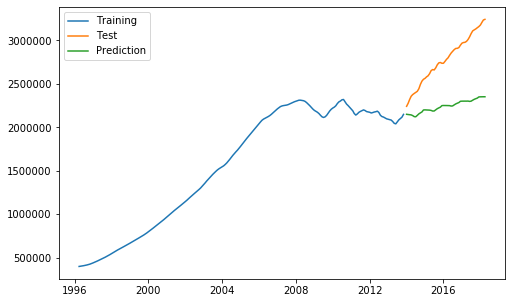

In [293]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [295]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-3.4163858034910284

### 10506

Text(0.5, 1.0, 'Median Sale Prices in 10506')

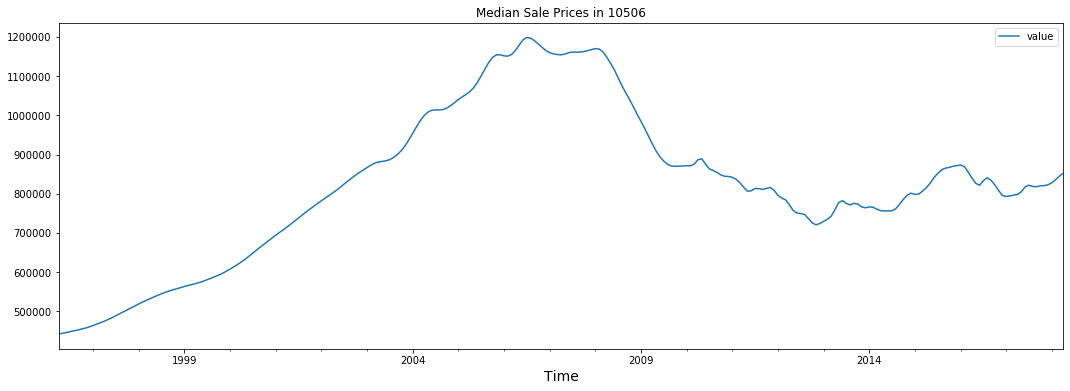

In [296]:
five_oh_six.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10506')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [297]:
adf_test.should_diff(five_oh_six)

(0.6712226209192221, True)

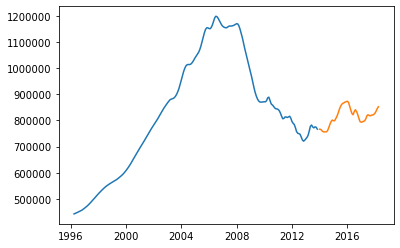

In [298]:
train = five_oh_six[:212]
test = five_oh_six[213:265]
plt.plot(train)
plt.plot(test)

In [301]:
ndiffs(five_oh_six)

2

In [300]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4224.473, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4212.076, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4257.080, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4442.581, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4427.157, Time=0.56 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4429.835, Time=0.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4225.618, Time=0.09 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4209.458, Time=0.68 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4211.433, Time=0.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4570.898, Time=0.74 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=4575.650, Time=0.29 sec
 ARIMA(2,1,0)(2,1,1)[12]          

In [302]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  212
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -2100.729
Date:                            Fri, 11 Dec 2020   AIC                           4209.458
Time:                                    22:08:56   BIC                           4222.631
Sample:                                         0   HQIC                          4214.790
                                            - 212                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0744      0.006     11.803      0.000       0.062       0.087
ar.L2          0.0464      0.010      4.868      0.000       0.028       0.065
ar.S.L12      -0.0417      0.011     -3.720      0.000      -0.064      -0.020
sigma2      8.608e+07   2.07e-12   4.15e+19      0.000    8.61e+07    8.61e+07
===================================================================================
Ljung-Box (Q):                      365.55   Jarque-Bera (JB):                21.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.13   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.05e+34. Standard errors may be unstable.
"""

In [303]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,769496.142827
2014-02-01,774029.829371
2014-03-01,779295.214913
2014-04-01,786399.088070
2014-05-01,801795.113503


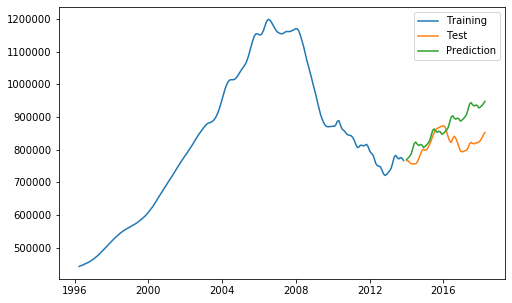

In [304]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [305]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-3.265888969541961

### 10538

Text(0.5, 1.0, 'Median Sale Prices in 10538')

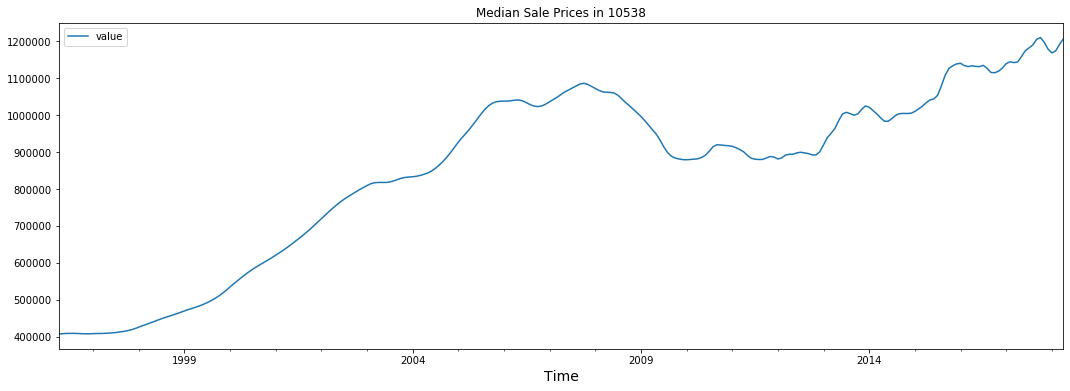

In [306]:
five_three_eight.plot(figsize = (18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Median Sale Prices in 10538')

### The Augmented Dickey-Fuller Test can be used to test for stationarity. 

In [307]:
adf_test.should_diff(five_three_eight)

(0.6684005012055338, True)

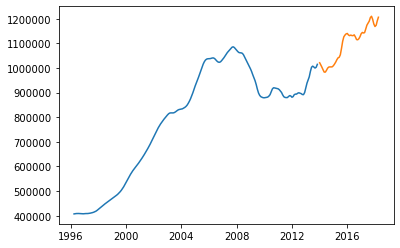

In [308]:
train = five_three_eight[:212]
test = five_three_eight[213:265]
plt.plot(train)
plt.plot(test)

In [312]:
ndiffs(five_three_eight)

1

In [322]:
arima_model = auto_arima(train, start_p = 0, d=1, start_q = 0,
                         max_p=10, max_d=10, max_q = 10, start_P = 0,
                        D = 1, start_Q=0, max_P=10, max_D = 10,
                        max_Q=5, m=12, seasonal=True, 
                        error_action = 'warn', trace = True,
                        random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4160.647, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4145.945, Time=0.64 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4158.994, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4148.545, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4571.342, Time=0.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4145.624, Time=0.50 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=4174.236, Time=2.10 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4161.487, Time=0.08 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=4140.247, Time=0.82 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4143.244, Time=0.21 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=4139.366, Time=1.64 sec
 ARIMA(2,1,0)(1,1,2)[12]          

In [323]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  212
Model:             SARIMAX(2, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -2064.683
Date:                                 Fri, 11 Dec 2020   AIC                           4139.366
Time:                                         22:11:13   BIC                           4155.833
Sample:                                              0   HQIC                          4146.031
                                                 - 212                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0753      0.006     12.403      0.000       0.063       0.087
ar.L2          0.0553      0.008      6.919      0.000       0.040       0.071
ma.S.L12      -0.0825      0.017     -4.809      0.000      -0.116      -0.049
ma.S.L24      -0.0356      0.011     -3.215      0.001      -0.057      -0.014
sigma2      5.964e+07   4.77e-12   1.25e+19      0.000    5.96e+07    5.96e+07
===================================================================================
Ljung-Box (Q):                      622.80   Jarque-Bera (JB):                16.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.43   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.28e+33. Standard errors may be unstable.
"""

In [324]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 52), index=test.index)
prediction.columns = ['prediction_sales']
prediction.head()

,prediction_sales
time,
2014-01-01,1.024144e+06
2014-02-01,1.042061e+06
2014-03-01,1.059856e+06
2014-04-01,1.071218e+06
2014-05-01,1.083012e+06


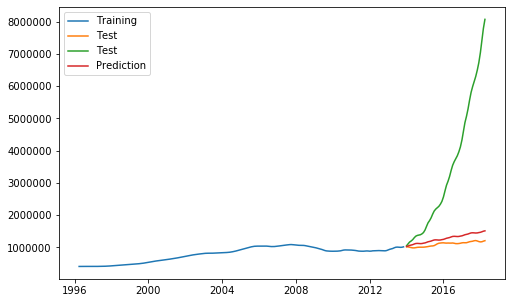

In [325]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'best')
plt.show()

In [326]:
test['predicted_sales'] = prediction
r2_score(test['value'], test['predicted_sales'])

/Users/jaklynsoler/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-6.099381886043898

In [ ]:
gtrends_diff = gtrends.diff(periods=1)

gtrends_diff.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

In [ ]:
df.corr()

# Step 6: Interpreting Results